In [46]:
'''Main'''
import numpy as np
import pandas as pd
import os
# Acquire Data
current_path = os.getcwd()
file = 'IDS\\merged.csv'
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

df = spark.read.csv(file, header = True, inferSchema = True)
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Dst Port: double (nullable = true)
 |-- Protocol: double (nullable = true)
 |-- Flow Duration: double (nullable = true)
 |-- Tot Fwd Pkts: double (nullable = true)
 |-- Tot Bwd Pkts: double (nullable = true)
 |-- TotLen Fwd Pkts: double (nullable = true)
 |-- TotLen Bwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Max: double (nullable = true)
 |-- Fwd Pkt Len Min: double (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: double (nullable = true)
 |-- Bwd Pkt Len Min: double (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: double (nullable = true)
 |-- Flow IAT Min: double (nullable = true)
 |-- Fwd IA

In [47]:
df = df.withColumnRenamed("Label", "Findvalue")
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Dst Port: double (nullable = true)
 |-- Protocol: double (nullable = true)
 |-- Flow Duration: double (nullable = true)
 |-- Tot Fwd Pkts: double (nullable = true)
 |-- Tot Bwd Pkts: double (nullable = true)
 |-- TotLen Fwd Pkts: double (nullable = true)
 |-- TotLen Bwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Max: double (nullable = true)
 |-- Fwd Pkt Len Min: double (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: double (nullable = true)
 |-- Bwd Pkt Len Min: double (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: double (nullable = true)
 |-- Flow IAT Min: double (nullable = true)
 |-- Fwd IA

In [48]:
df = df[df.Findvalue >= 0 ]

In [49]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
_c0,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Dst Port,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Protocol,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Flow Duration,1.153079e+08,6.099746e+07,6.099756e+07,6.199750e+07,6.199750e+07
Tot Fwd Pkts,5.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
Tot Bwd Pkts,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TotLen Fwd Pkts,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TotLen Bwd Pkts,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fwd Pkt Len Max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fwd Pkt Len Min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [50]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,8247888,491984.51539485017,301606.4530886746,0,1048574


In [51]:
df = df.select('Dst Port', 
'Protocol', 
'Fwd PSH Flags',    
'FIN Flag Cnt',
'RST Flag Cnt',
'ACK Flag Cnt',
'URG Flag Cnt',
'Down/Up Ratio',
'Tot Fwd Pkts',
'Tot Bwd Pkts',
'Fwd Pkt Len Max',
'Fwd Pkt Len Min',
'Bwd Pkt Len Mean',
'Flow Byts/s',
'Flow Pkts/s',
'Flow IAT Mean',
'Flow IAT Std',
'Bwd IAT Tot',
'Bwd IAT Mean',
'Bwd IAT Std',
'Pkt Len Var',
'Fwd Blk Rate Avg',
'Subflow Fwd Byts',
'Init Fwd Win Byts',
'Init Bwd Win Byts',
'Fwd Seg Size Min',
'Active Mean',
'Active Std',
'Idle Std',
'Findvalue')
cols = df.columns
df.printSchema()

root
 |-- Dst Port: double (nullable = true)
 |-- Protocol: double (nullable = true)
 |-- Fwd PSH Flags: double (nullable = true)
 |-- FIN Flag Cnt: double (nullable = true)
 |-- RST Flag Cnt: double (nullable = true)
 |-- ACK Flag Cnt: double (nullable = true)
 |-- URG Flag Cnt: double (nullable = true)
 |-- Down/Up Ratio: double (nullable = true)
 |-- Tot Fwd Pkts: double (nullable = true)
 |-- Tot Bwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Max: double (nullable = true)
 |-- Fwd Pkt Len Min: double (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Bwd IAT Tot: double (nullable = true)
 |-- Bwd IAT Mean: double (nullable = true)
 |-- Bwd IAT Std: double (nullable = true)
 |-- Pkt Len Var: double (nullable = true)
 |-- Fwd Blk Rate Avg: double (nullable = true)
 |-- Subflow Fwd Byts: 

In [52]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ['Dst Port', 'Protocol', 'Fwd PSH Flags',  
                      'FIN Flag Cnt',
'RST Flag Cnt',
'ACK Flag Cnt',
'URG Flag Cnt',
'Down/Up Ratio']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'Findvalue', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['Tot Fwd Pkts',
'Tot Bwd Pkts',
'Fwd Pkt Len Max',
'Fwd Pkt Len Min',
'Bwd Pkt Len Mean',
'Flow Byts/s',
'Flow Pkts/s',
'Flow IAT Mean',
'Flow IAT Std',
'Bwd IAT Tot',
'Bwd IAT Mean',
'Bwd IAT Std',
'Subflow Fwd Byts',
'Fwd Blk Rate Avg',
'Init Fwd Win Byts',
'Init Bwd Win Byts',
'Pkt Len Var',
'Fwd Seg Size Min',
'Active Mean',
'Active Std',
'Idle Std']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [53]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Dst Port: double (nullable = true)
 |-- Protocol: double (nullable = true)
 |-- Fwd PSH Flags: double (nullable = true)
 |-- FIN Flag Cnt: double (nullable = true)
 |-- RST Flag Cnt: double (nullable = true)
 |-- ACK Flag Cnt: double (nullable = true)
 |-- URG Flag Cnt: double (nullable = true)
 |-- Down/Up Ratio: double (nullable = true)
 |-- Tot Fwd Pkts: double (nullable = true)
 |-- Tot Bwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Max: double (nullable = true)
 |-- Fwd Pkt Len Min: double (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Bwd IAT Tot: double (nullable = true)
 |-- Bwd IAT Mean: double (nullable = true)
 |-- Bwd IAT Std: double (nullable = true)
 |-- Pkt Len Var: double (nullable =

In [54]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,0,0,0,0,0
features,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
Dst Port,0,0,0,0,0
Protocol,0,0,0,0,0
Fwd PSH Flags,0,0,0,0,0
FIN Flag Cnt,0,0,0,0,0
RST Flag Cnt,0,0,0,0,0
ACK Flag Cnt,0,0,0,0,0
URG Flag Cnt,0,0,0,0,0
Down/Up Ratio,0,0,0,0,0


In [55]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 5772426
Test Dataset Count: 2475462


In [56]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

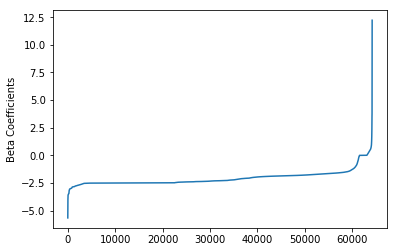

In [57]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

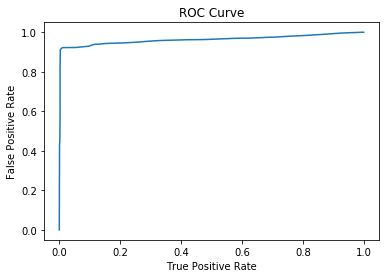

Training set areaUnderROC: 0.9626520379613123


In [58]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

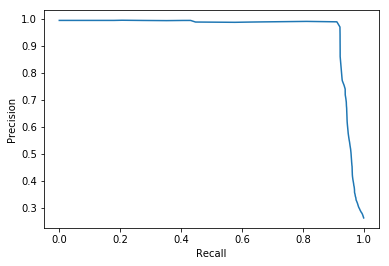

In [59]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [60]:
predictions = lrModel.transform(test)
predictions.select('Dst Port', 'Protocol', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------+--------+-----+--------------------+----------+--------------------+
|Dst Port|Protocol|label|       rawPrediction|prediction|         probability|
+--------+--------+-----+--------------------+----------+--------------------+
|    80.0|     6.0|  0.0|[-1.4240219716085...|       1.0|[0.19403183954459...|
|    80.0|     6.0|  0.0|[-1.4248534283009...|       1.0|[0.19390184652719...|
|    80.0|     6.0|  0.0|[-2.8500874268726...|       1.0|[0.05467679818573...|
|    80.0|     6.0|  0.0|[-2.8501227711431...|       1.0|[0.05467497136649...|
|    80.0|     6.0|  0.0|[-2.8501466105190...|       1.0|[0.05467373922666...|
|    80.0|     6.0|  0.0|[-3.6606650213251...|       1.0|[0.02507070245946...|
|    80.0|     6.0|  0.0|[-2.7929438096801...|       1.0|[0.05770667230170...|
|    80.0|     6.0|  0.0|[-0.9592930340603...|       1.0|[0.27701976355991...|
|    80.0|     6.0|  0.0|[-2.8102975254671...|       1.0|[0.05677024699663...|
|    80.0|     6.0|  0.0|[-2.6554952925416...|      

In [61]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.96237600010913


In [62]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under PR', evaluator.evaluate(predictions,{evaluator.metricName: "areaUnderPR"}))

Test Area Under PR 0.953125476197673
